In [1]:
import pandas_datareader as pdr

In [2]:
import pandas_datareader as pdr

In [3]:
!pip install pandas_datareader

In [4]:
import pandas_datareader as pdr

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key="b137ccf0a89acb6573646270ed7bfa1465d639bf")

In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-03-26 00:00:00+00:00,172.77,173.10,166.44,168.07,36272617,41.120572,41.199114,39.613984,40.001936,145090468,0.0,1.0
1,AAPL,2018-03-27 00:00:00+00:00,168.34,175.15,166.92,173.68,38962839,40.066198,41.687030,39.728227,41.337159,155851356,0.0,1.0
2,AAPL,2018-03-28 00:00:00+00:00,166.48,170.02,165.19,167.25,41668545,39.623504,40.466051,39.316474,39.806770,166674180,0.0,1.0
3,AAPL,2018-03-29 00:00:00+00:00,167.78,171.75,166.90,167.81,38398505,39.932914,40.877804,39.723467,39.940054,153594020,0.0,1.0
4,AAPL,2018-04-02 00:00:00+00:00,166.68,168.94,164.47,166.64,37586791,39.671106,40.209003,39.145109,39.661585,150347164,0.0,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0       172.77
1       168.34
2       166.48
3       167.78
4       166.68
         ...  
1251    152.99
1252    155.85
1253    155.00
1254    157.40
1255    159.28
Name: close, Length: 1256, dtype: float64

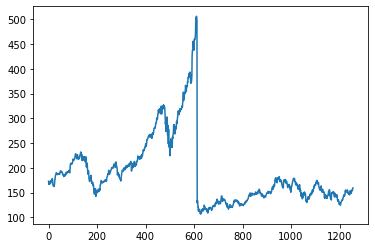

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to scale of the data. So, we apply MinMax scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.16513463],
       [0.15403882],
       [0.14938009],
       ...,
       [0.12062617],
       [0.12663745],
       [0.13134627]])

In [17]:
##slitting dataset into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(816, 440)

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 328ms/step - loss: 0.0432 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0182 - val_loss: 0.0060
Epoch 3/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0131 - val_loss: 4.9063e-04
Epoch 4/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0108 - val_loss: 0.0014
Epoch 5/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0110 - val_loss: 0.0024
Epoch 6/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0106 - val_loss: 4.9070e-04
Epoch 7/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0091 - val_loss: 6.4625e-04
Epoch 8/100
12/12 [==============================] - 2s 165ms/step - loss: 0.0080 - val_loss: 3.9491e-04
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0072 - val_loss: 3.6397e-04
Epoch 10/100
12/12 [==============================] - 2s 187ms/step - 

12/12 [==============================] - 2s 162ms/step - loss: 0.0016 - val_loss: 3.0859e-04
Epoch 79/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0017 - val_loss: 2.4832e-04
Epoch 80/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0014 - val_loss: 2.4439e-04
Epoch 81/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0014 - val_loss: 2.4385e-04
Epoch 82/100
12/12 [==============================] - 2s 159ms/step - loss: 0.0016 - val_loss: 2.4971e-04
Epoch 83/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0014 - val_loss: 2.6487e-04
Epoch 84/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0014 - val_loss: 2.5311e-04
Epoch 85/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0014 - val_loss: 2.7901e-04
Epoch 86/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0014 - val_loss: 2.5740e-04
Epoch 87/100
12/12 [==============================] - 2s 14

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.11.1'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.27438997634894

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

157.1660246665333

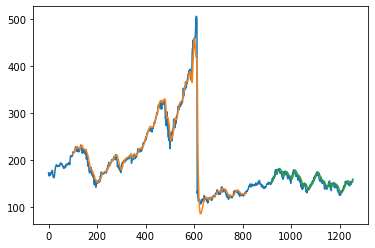

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12234139]
101
1 day input [0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495
 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675  0.05808391
 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538
 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112
 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253

10 day output [[0.13579865]]
11 day input [0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555
 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444
 0.08541014 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958
 0.07428929 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424
 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344 0.04566061
 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016
 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073
 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982
 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517

20 day output [[0.1469718]]
21 day input [0.10336882 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741
 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12234139 0.12450822 0.1263039  0.12779576 0.12908974
 0.13027245 0.1314002

29 day output [[0.15739049]]
[[0.12234139442443848], [0.12450821697711945], [0.12630389630794525], [0.1277957558631897], [0.12908974289894104], [0.13027244806289673], [0.13140027225017548], [0.13250494003295898], [0.1336023211479187], [0.13469935953617096], [0.1357986479997635], [0.1369009017944336], [0.13800622522830963], [0.13911466300487518], [0.14022625982761383], [0.1413411647081375], [0.14245957136154175], [0.14358162879943848], [0.144707590341568], [0.14583756029605865], [0.14697180688381195], [0.14811040461063385], [0.1492534875869751], [0.15040117502212524], [0.1515536606311798], [0.1527108997106552], [0.15387313067913055], [0.1550404131412506], [0.15621282160282135], [0.15739049017429352]]


In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1256

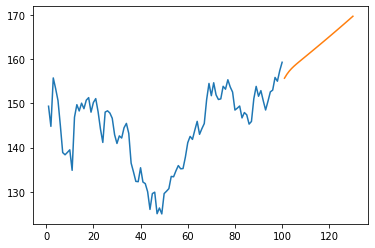

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

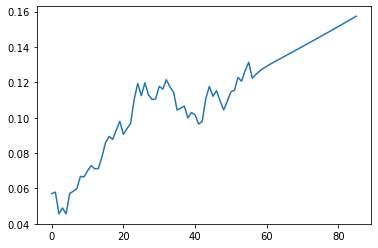

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

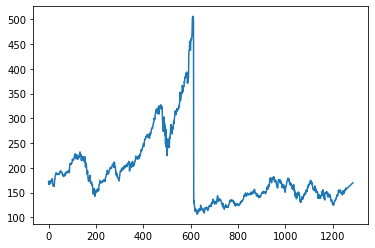

In [46]:
plt.plot(df3)